In [1]:
# 1. citesti datele din .dat si creezi loaders

import idk
import feature_extractors
import joblib

# baga aici folderu cu fisierele .dat
data_dir = "E:/Downloads/big_dataset/big_dataset"

X_train, y_train, X_val, y_val, X_test, y_test = feature_extractors.read_vectorized_features_2(data_dir)
train_loader, val_loader, test_loader, scaler = idk.prepare_dataloaders(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=128) # aici aproape imi pusca mie :(
joblib.dump(scaler, "scalers/scaler_big.pkl")

print(X_train.shape, X_val.shape, X_test.shape)

(1105702, 2351) (195124, 2351) (433609, 2351)


In [2]:
# 2. creezi modelul (asta ar fi primul si daca e necesar mai fac unul)

import torch.nn as nn
import torch.optim as optim

class Model_v1_BIG(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),

            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024), 
            
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),  
           
            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

----------Training on Model_v2_BIG----------


True
Model_v1_BIG(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=2048, out_features=1024, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=1024, out_features=1, bias=True)
    (10): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.0965 | Train Acc: 0.9625 | Val Loss: 0.0736 | Val Acc: 0.9724
Saved model
Epoch 2 | Train Loss: 0.0621 | Train Acc: 0.9760 | Val Loss: 0.0599 | Val Acc: 0.9781
Saved model
Epoch 3 | Train Loss: 0.0491 | Train Acc: 0.9811 | Val Loss: 0.0590 | Val Acc: 0.9786
Saved model
Epoch 4 | Train Los

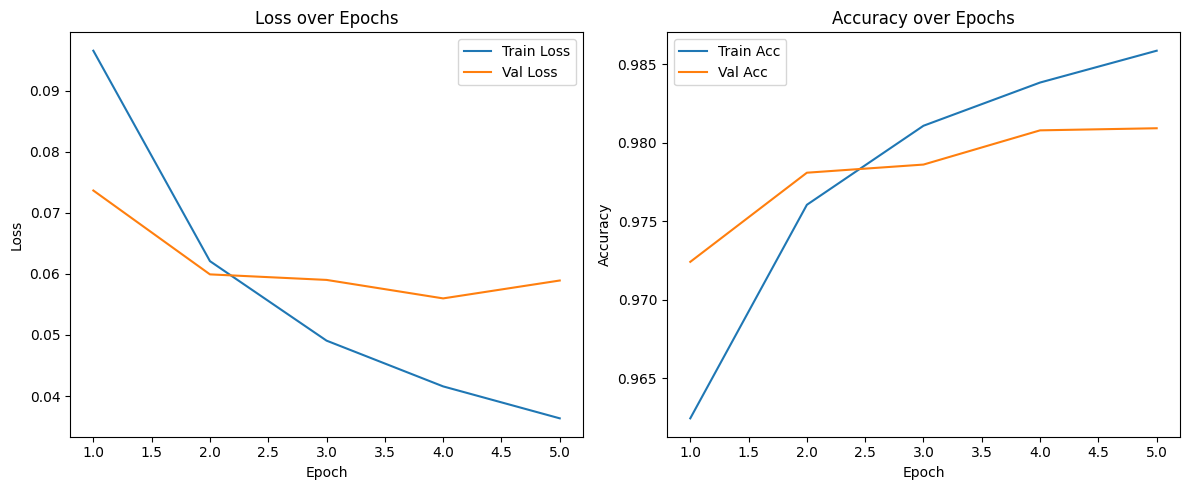

Test Accuracy: 0.976490
Test Precision: 0.976957
Test Recall: 0.975444
Test F1 Score: 0.976200
Test ROC AUC: 0.996134
AUC Score: 0.996134


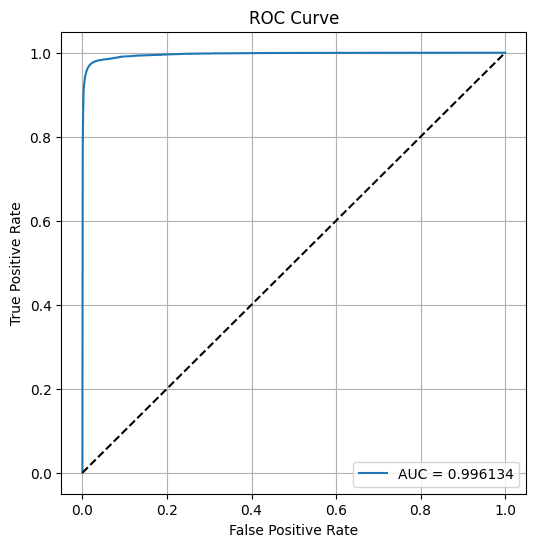

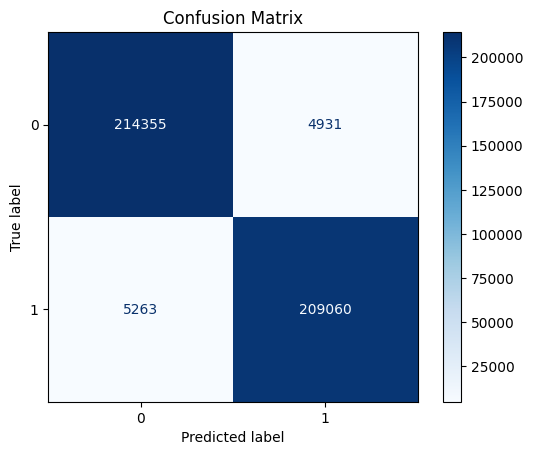


Performance at 1.0% FPR:
Threshold: 0.8172
False Positive Rate: 0.9992%
False Negative Rate: 4.2935%
Detection Rate (TPR): 95.7065%

Performance at 0.1% FPR:
Threshold: 0.9987
False Positive Rate: 0.0967%
False Negative Rate: 21.0584%
Detection Rate (TPR): 78.9416%


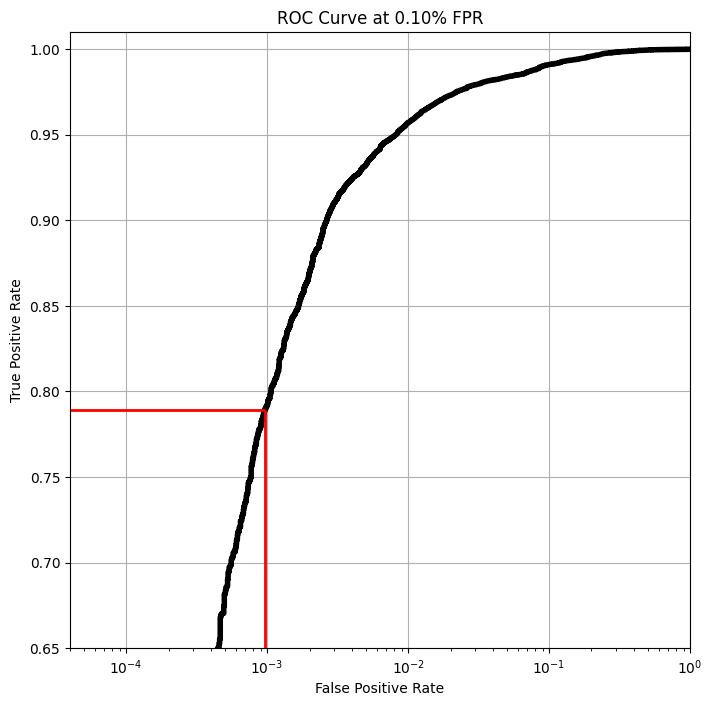

In [3]:
# 3. test + train

import torch
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v2_BIG----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
model = Model_v1_BIG()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_BIG_v2.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_BIG_v1"
)

model.load_state_dict(torch.load("models/Model_BIG_v2.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])